# Project: Investigate a Dataset - [TMDb movies dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul

<a id='intro'></a>

<a id='intro'></a>
## Introduction

### Dataset Description 

  >  The TMDb movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It consists of details such as title, cast, director, budget, revenue, and ratings among others. Understanding the dynamics of movie success can be useful for studios during the production planning phase.

### Question(s) for Analysis
 > Q1: Are certain genres more popular then others?
 
 > Q2: Which actors had the longest career in terms of the number of films they've appeared in?
 
 > Q3: Had the most popular films the highest revenue too?
 
 > Q4: Which company/companies produced the most films in 2015?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

> I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

In [2]:
df = pd.read_csv('/workspace/Database_TMDb_movie_data/tmdb-movies.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### We can observe there are 10866 entries and 21 columns in total (starting with index 0) and the data type of each variable: float64(4), int64(6), object(11). Also, we see that we got some columns which includes null data.
### Data Cleaning
 

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
def fill_missing_values(df, columns, fill_value='Unknown'):
    for column in columns:
        df[column].fillna(fill_value, inplace=True)

columns_to_fill = ['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']
fill_missing_values(df, columns_to_fill)

df.isnull().sum()
df.drop_duplicates(inplace=True)

columns_to_strip = ['director', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies']
for col in columns_to_strip:
    if df[col].dtype == 'object': df[col] = df[col].str.strip()
        
df = df[(df['runtime'] > 0) & (df['budget'] > 0) & (df['revenue'] > 0)]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   imdb_id               3854 non-null   object        
 2   popularity            3854 non-null   float64       
 3   budget                3854 non-null   int64         
 4   revenue               3854 non-null   int64         
 5   original_title        3854 non-null   object        
 6   cast                  3854 non-null   object        
 7   homepage              3854 non-null   object        
 8   director              3854 non-null   object        
 9   tagline               3854 non-null   object        
 10  keywords              3854 non-null   object        
 11  overview              3854 non-null   object        
 12  runtime               3854 non-null   int64         
 13  genres           

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


#### We can see above that after we cleaned our date(filling NaN spaces, dropping duplicates, stripping columns and making sure that bugdet, revenue and runtime columns doesn't contain negative values, now we only got 3854 observations and saved a lot of memory.



<a id='eda'></a>
## Exploratory Data Analysis


### Q1:  Are certain genres more popular then others? (Show the distribution of genres)

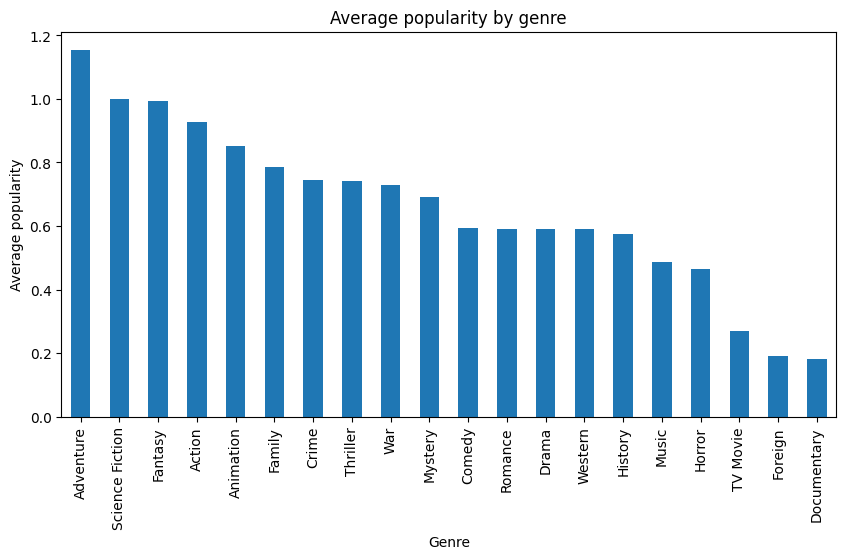

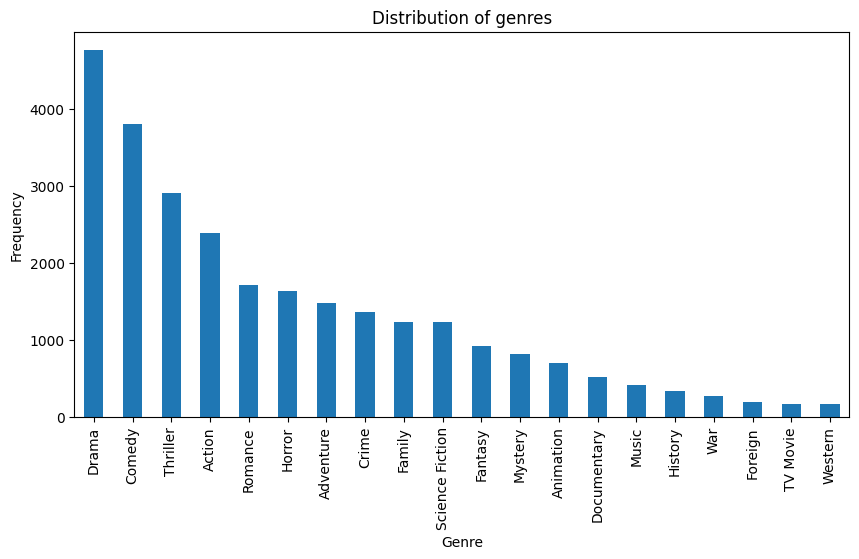

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
genres_exploded = df.assign(genres=df['genres'].str.split('|')).explode('genres')
genre_popularity = genres_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False)
genres_exploded
genre_popularity
genre_counts = genres_exploded['genres'].value_counts()
def plots(data, title, xlabel, ylabel, kind='bar', figsize=(10,5)):
    data.plot(kind=kind,title=title,xlabel=xlabel,ylabel=ylabel,figsize=figsize)
    plt.show()
plots(genre_popularity, 'Average popularity by genre',"Genre","Average popularity",'bar')
plots(genre_counts,'Distribution of genres','Genre','Frequency','bar')


> So, after we calculate the mean for genres popularity we can observe by the bar plot that the most popular genre is Adventure and the least popular is Documentary, so people are more interested in dynamic films.
> We also see that by distribution of genres, drama is the most common genre and Western the least common.

### Q2: Which actors had the longest career in terms of the number of films they've appeared in? 

In [ ]:
df['cast'].head()
cast_exploded = df.assign(cast = df['cast'].str.split("|")).explode('cast')
cast_grouped = cast_exploded.groupby('cast')['release_year']
min_years = cast_grouped.min()
max_years = cast_grouped.max()
career_stats = pd.DataFrame({
    'Number of Films': cast_grouped.count(),
    'First Year': min_years,
    'Last Year': max_years,
    'Career Span': max_years - min_years
})
print(career_stats.sort_values(by='Number of Films', ascending=False).head(10))
career_stats.plot(x='Career Span', y='Number of Films', title = 'Career Span vs. Number of Films', kind='scatter', xlabel='Career Span(Years)', ylabel='Number of Films')

> We can see that Robert de Niro appeared in the most films (72) in 42 years of activity. Then I tried to find out if there exists a correlation between years of activity of each actor and the number of films they appeared in. The data seems to be grouped, but there are outliers like Samuel Jackson which had a lot of films he acted in just 23 years of activity or Bruce Willis. So, the most looked up actors are outliers in this dataset

### Q3: Had the most popular films the highest revenue too?
### Q3.1: Does the budget might reveal whether higher investments translate to better financial returns regardless of popularity?

The correlation between popularity and revenue is 0.615534654554661
The correlation between budget and revenue is 0.6885561524636742


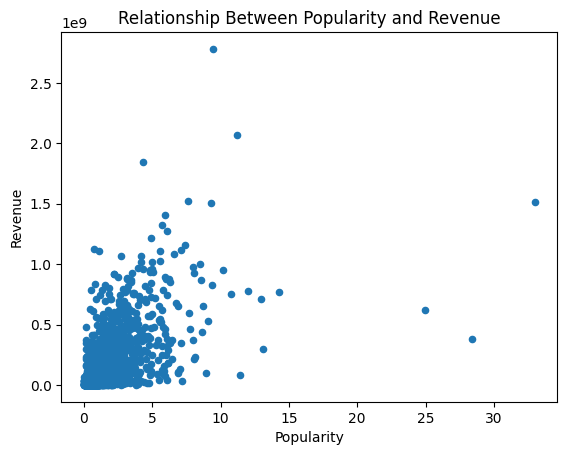

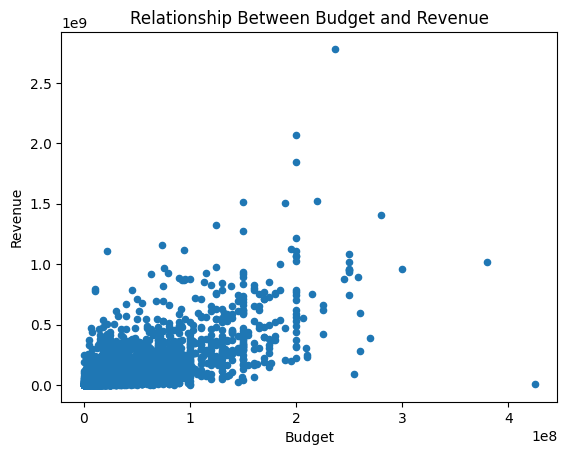

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_and_correlate(df, x_col, y_col, plot_title, x_label, y_label, kind='scatter'):

    df.plot(x=x_col, y=y_col, title=plot_title, xlabel=x_label, ylabel=y_label, kind=kind)

    correlation = df[x_col].corr(df[y_col])
    print(f'The correlation between {x_col} and {y_col} is {correlation}')
    return correlation

correlation_pop_revenue = plot_and_correlate( df, 'popularity', 'revenue','Relationship Between Popularity and Revenue','Popularity', 'Revenue')

correlation_budget_revenue = plot_and_correlate(df, 'budget', 'revenue','Relationship Between Budget and Revenue','Budget', 'Revenue')


> We observe the correlation is 0.615534654554661 which suggests a moderately strong positive correlation, so, as a film's popularity increases, there is a tendency for its revenue to increase aswell. By the scatterplot we can say that most of the films got low to medium popularity so their revenue is similarly low, but there are a few outliers which got either big revenue but low popularity or high popularity and low revenue.

> The correlation between budget and revenue is 0.6885561524636742 which means that budget is more representative in predicting the revenue than popularity

### Q4: Which company/companies produced the most films in 2015? 
### Q4.1 : If there are equal values, which value appears the most?

In [25]:
films_2015 = df[df['release_year'] == 2015]
companies_count = films_2015['production_companies'].value_counts()
companies_count.mode().iloc[0]
companies_count.head(25)

The Asylum                                                                  4
Warner Bros. Animation                                                      4
WWE Studios                                                                 4
Cinetel Films                                                               3
Sony Pictures                                                               2
Tiberius Film                                                               2
Mattel Playground Productions                                               2
Worldview Entertainment                                                     2
Johnson Production Group|Shadowland                                         2
Pixar Animation Studios                                                     2
Netflix                                                                     2
BBC                                                                         2
Happy Madison Productions                                       

> The companies who produced the most films in 2015 are: The Asylum, Warner Bros. Animation and WWE Studios with 4 films for each of those, but there aren't huge number of films difference between companies for this year. The most production companies released one film in 2015.

<a id='conclusions'></a>
## Conclusions

> The analysis of the TMDb movies dataset reveals several impactful trends and relationships within the film industry. These insights can guide strategic decision-making for stakeholders engaged in film production, distribution, and marketing:

> Adventure Genre Preference:

    Films classified under the adventure genre consistently show higher popularity ratings, suggesting a strong audience preference. This trend could inform genre selection and thematic decisions in future projects to align with audience preferences and maximize engagement.
> Influence of Veteran Actors:

    The enduring careers and high productivity of actors like Robert De Niro and Samuel L. Jackson highlight the value of experienced talent in attracting audiences. Their involvement in projects can enhance a film's appeal and commercial success, underscoring the importance of strategic casting in production planning.
> Economic Impact of Popularity:

    The moderate correlation between a film's popularity and its revenue generation underscores the importance of robust marketing strategies. This relationship suggests that enhancing a film's market visibility can significantly impact its financial success, although it should be complemented by other factors for optimal results.
> Budget as a Revenue Driver:

    The strong correlation between budget and revenue highlights the potential return on investment from higher production budgets. However, the data also calls for a balanced approach to budget allocation, ensuring that investments are made judiciously to optimize both artistic and commercial outcomes.
> Production Dynamics of 2015:

    The activity levels of different production companies in 2015 illustrate the competitive nature of the film industry. The dominance of a few companies in terms of production output suggests that while leading studios often drive market trends, there is room for smaller players to make significant impacts.
> Additional Insights:

    Strategic Casting and Marketing: The findings reinforce the need for a strategic approach to casting and marketing, as these factors considerably influence a film's reception and economic success.
    
    Balanced Investments: The insights into budget and revenue correlations highlight the necessity for balanced investments across production, marketing, and distribution to maximize the profitability of film projects.
    

> Data Limitations:

    Incomplete Data: The dataset shows a considerable number of missing entries, especially in the 'homepage', 'tagline', and 'production companies' columns. This absence of data may have compromised the depth and accuracy of the analysis, notably in evaluating factors such as online engagement through homepages and the effectiveness of promotional taglines.
    
    Data Quality and Reliability: There are records within the dataset that feature zero or highly improbable figures for budgets and revenues. These discrepancies may have distorted the analysis, potentially leading to incorrect assumptions about the financial aspects and success metrics of the films.
    
    Dataset Representation: The data primarily focuses on mainstream and commercial films, which may not accurately reflect the diversity of the film industry, including independent and non-mainstream genres, as well as films produced outside of the Western market. This could limit the applicability of the findings to the global film market.

## Submitting your Project 

In [28]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 500263 bytes to Investigate_a_Dataset.html
